### Plotting Top Finishes Per Country

In [28]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
plt.clf()
sns.set_palette("pastel")

<Figure size 432x288 with 0 Axes>

In [30]:
merged_euro = pd.read_csv(os.path.join('data',r'cleaned_wikipedia_songs.csv'))
merged_euro = merged_euro[merged_euro["rank"].isin([1,2,3])] #we want top 3 finishes only

In [31]:
df_plot = merged_euro.groupby(['rank', 'country']).size().reset_index().pivot(columns='rank', index='country', values=0)

# adding zero values for the countries that've never placed in the top in Eurovision
listEurovisionCountries = ["Albania","Andorra","Armenia","Australia","Austria","Azerbaijan", \
                           "Belarus","Bosnia and Herzegovina","Bulgaria","Croatia","Cyprus","Czech Republic",\
                          "Denmark","Estonia","Finland","France","Georgia","Germany","Greece","Hungary", \
                          "Iceland","Ireland","Israel","Italy","Latvia","Lithuania","Luxembourg", \
                          "Macedonia, FYR","Malta","Moldova","Monaco","Montenegro","Morocco","Netherlands", \
                          "Norway","Poland","Portugal","Romania","Russia", \
                           "San Marino","Serbia","Slovak Republic","Slovenia","Spain","Sweden","Switzerland", \
                           "Turkey","Ukraine","United Kingdom"]
winning_countries = [x.lstrip()  for x in df_plot.index] # getting rid of extra spaces
other_countries =  [item for item in listEurovisionCountries if item not in winning_countries]
for o in other_countries:
    df_plot.loc[o] =  [0, 0, 0]


# ordering by descending total (and then deleting the total column so that it won't be rendered in the graph)
df_plot['total'] = df_plot.fillna(0)[1] + df_plot.fillna(0)[2] + df_plot.fillna(0)[3]
df_plot = df_plot.sort_values(by=['total'],ascending=False)
del df_plot['total']

In [32]:
# # getting the areas of each country (as of 2018) and adding it to the df
# country_area = pd.read_csv(os.path.join('data',r'countryarea.csv'))
# country_area = country_area[["Country Name","2018"]]
# country_area['Country Name'] = country_area['Country Name'].astype(str)

# df_plot.fillna(float(0), inplace=True)
# originalIndices = df_plot.index
# joined = pd.merge(left=df_plot, right=country_area[["Country Name","2018"]], how='left',left_index=True, right_on="Country Name")
# joined = joined.set_index(originalIndices)
# del joined['Country Name']

# print(joined)
# print(len(joined))

Text(0.5, 1.0, 'Number of Eurovision Top Finishes By Country')

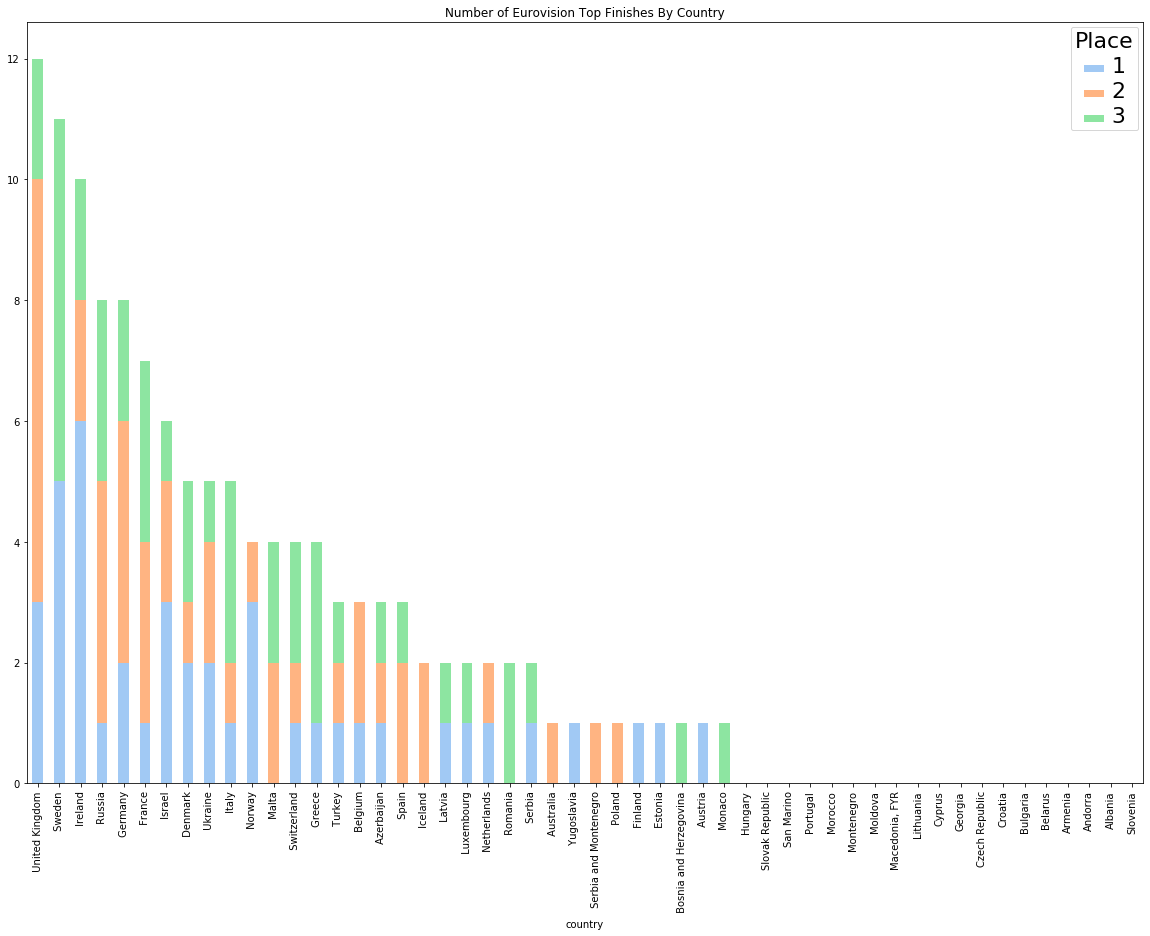

In [33]:
chart = df_plot.plot(kind='bar', stacked=True)
plt.legend(title="Place")
plt.gcf().set_size_inches(20,14)
plt.setp(chart.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(chart.get_legend().get_title(), fontsize='22') # for legend title
chart.set_title('Number of Eurovision Top Finishes By Country')

In [34]:
# This doesn't actually work (it saves a blank image)
# plt.savefig(os.path.join('visualizations','winspercountry.png'))

### Plotting Keys of Top Finishing Songs

In [35]:
keys_df = pd.read_csv(os.path.join('data',r'merged_euro.csv'))
filter = (~keys_df["tempo"].between(115.34,115.35))# getting the rows with non-null values
keys_df = keys_df[filter] 

In [36]:
# converting the numerical keys into a human-readable format
mapped_keys = keys_df["key"].map({float(0): 'C', float(1): 'C#', float(2): 'D', float(3): 'D#', float(4): 'E', float(5): 'F', float(6): 'F#', float(7): 'G', float(8): 'G#', float(9): 'A', float(10): 'A#', float(11): 'B'})
keys_df["mapped_keys"] = mapped_keys

Text(0.5, 1.0, 'Number of Eurovision Top Finishing Songs By Key')

<Figure size 432x288 with 0 Axes>

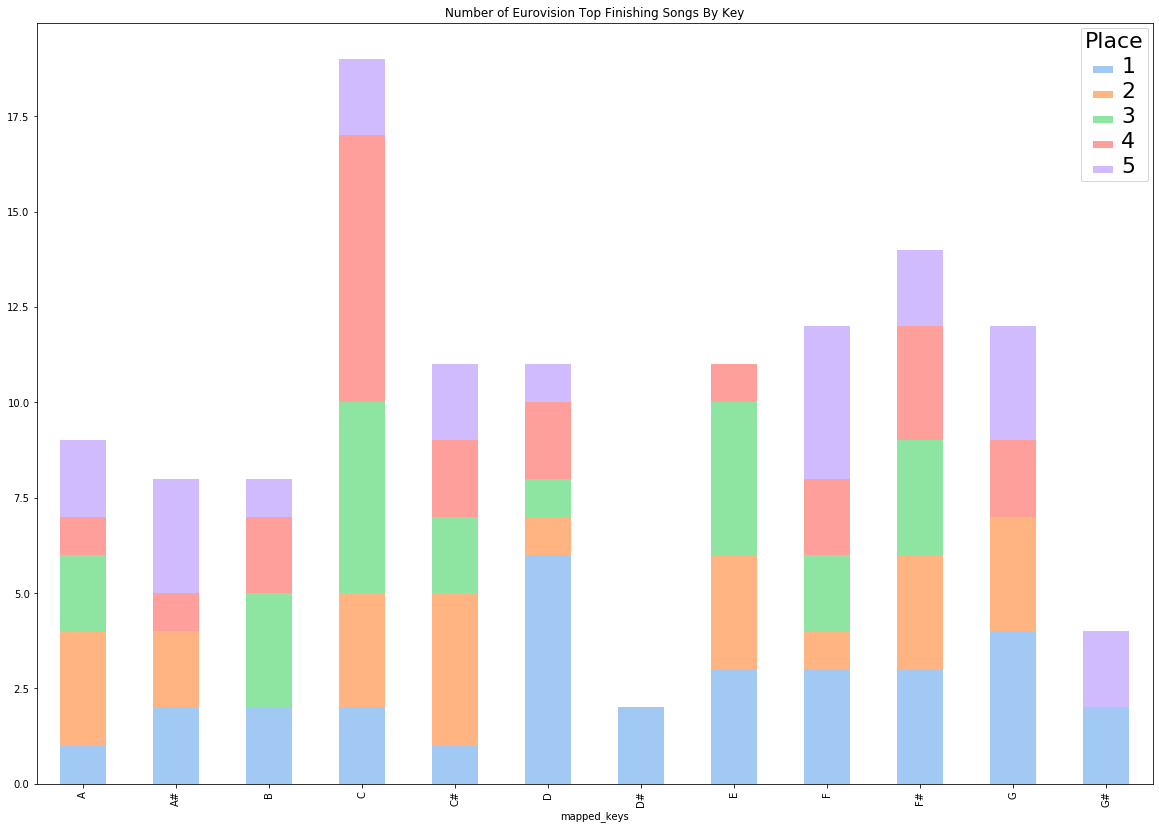

In [37]:
plt.clf()
keys_plot = keys_df.groupby(['rank', 'mapped_keys']).size().reset_index().pivot(columns='rank', index='mapped_keys', values=0)
chart = keys_plot.plot(kind='bar', stacked=True)
plt.legend(title="Place")
plt.gcf().set_size_inches(20,14)
plt.setp(chart.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(chart.get_legend().get_title(), fontsize='22') # for legend title
chart.set_title('Number of Eurovision Top Finishing Songs By Key')

In [38]:
# This doesn't actually work (it saves a blank image)
#plt.savefig(os.path.join('visualizations','keys.png'))